# Converting "sp" objects to "sf" objects

The following makes use of the *sf*, *cshapes*, and *sp* packages. You may need to install them from
[CRAN](https://cran.r-project.org) using the code
`install.packages(c("sf","cshapes","sp"))` if you want to run this on your computer. (The
package is already installed in the notebook container, however.)

In [1]:
library(sf)

Linking to GEOS 3.11.1, GDAL 3.6.2, PROJ 9.1.1; sf_use_s2() is TRUE


In [2]:
library(cshapes)

Loading required package: sp
Loading required package: maptools
Please note that 'maptools' will be retired during October 2023,
plan transition at your earliest convenience (see
https://r-spatial.org/r/2023/05/15/evolution4.html and earlier blogs
for guidance);some functionality will be moved to 'sp'.
 Checking rgeos availability: FALSE
Loading required package: plyr


In [3]:
cshapes.1990 <- cshp(as.Date("1990-01-01"))
cshapes.1990 <- as(cshapes.1990,"sf")

shapelib support is provided by GDAL through the sf and terra packages among others


In [4]:
options(width=200)
print(cshapes.1990[c(1:3,10)])

Simple feature collection with 171 features and 4 fieldsGeometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -180 ymin: -55.90223 xmax: 180 ymax: 83.11387Geodetic CRS:  +proj=longlat +ellps=WGS84
First 10 features:
           CNTRY_NAME         AREA       CAPNAME COWSDAY                       geometry
0              Guyana  211982.0050    Georgetown      26 MULTIPOLYGON (((-58.17262 6...
1            Suriname  145952.2740    Paramaribo      25 MULTIPOLYGON (((-55.12796 5...
2 Trinidad and Tobago    5041.7290 Port-of-Spain      31 MULTIPOLYGON (((-61.07556 1...
3           Venezuela  916782.2172       Caracas       1 MULTIPOLYGON (((-66.20973 1...
4               Samoa    2955.2124          Apia      15 MULTIPOLYGON (((-171.4653 -...
5               Tonga     464.7473    Nuku'alofa      14 MULTIPOLYGON (((-175.1864 -...
6           Argentina 2787442.0977  Buenos Aires       1 MULTIPOLYGON (((-68.62099 -...
7             Bolivia 1092697.4356        La Paz       1 MULTIPOLYG

In [5]:
SthAmCntry.names <- c(
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela")

In [6]:
SthAmCountries <-
    subset(cshapes.1990,
           CNTRY_NAME %in% SthAmCntry.names)

In [7]:
Brazil <- subset(cshapes.1990,CNTRY_NAME=="Brazil")
Chile <-  subset(cshapes.1990,CNTRY_NAME=="Chile")
Colombia <-  subset(cshapes.1990,CNTRY_NAME=="Colombia")

In [8]:
cap.latlong <- with(cshapes.1990,cbind(CAPLONG,CAPLAT))

In [9]:
cap.latlong <- lapply(1:nrow(cap.latlong),
                      function(i)cap.latlong[i,])

In [10]:
cap.latlong <- lapply(cap.latlong,st_point)
cap.latlong <- st_sfc(cap.latlong)

In [11]:
cshapes.capitals.1990 <- cshapes.1990
st_geometry(cshapes.capitals.1990) <- cap.latlong

In [12]:
st_crs(cshapes.capitals.1990) <- st_crs(cshapes.1990)

In [13]:
print(cshapes.capitals.1990[c(1:3,10)])

Simple feature collection with 171 features and 4 fieldsGeometry type: POINT
Dimension:     XY
Bounding box:  xmin: -175 ymin: -41.3 xmax: 179 ymax: 64.15Geodetic CRS:  +proj=longlat +ellps=WGS84
First 10 features:
           CNTRY_NAME         AREA       CAPNAME COWSDAY               geometry
0              Guyana  211982.0050    Georgetown      26      POINT (-58.2 6.8)
1            Suriname  145952.2740    Paramaribo      25 POINT (-55.2 5.833333)
2 Trinidad and Tobago    5041.7290 Port-of-Spain      31    POINT (-61.5 10.65)
3           Venezuela  916782.2172       Caracas       1     POINT (-66.9 10.5)
4               Samoa    2955.2124          Apia      15     POINT (-172 -13.8)
5               Tonga     464.7473    Nuku'alofa      14     POINT (-175 -21.1)
6           Argentina 2787442.0977  Buenos Aires       1    POINT (-58.7 -34.6)
7             Bolivia 1092697.4356        La Paz       1    POINT (-68.2 -16.5)
8              Brazil 8523619.5715      Brasilia      21    POINT

In [14]:
Brasilia <- subset(cshapes.capitals.1990,CNTRY_NAME=="Brazil")
Santiago <-  subset(cshapes.capitals.1990,CNTRY_NAME=="Chile")
Bogota <-  subset(cshapes.capitals.1990,CNTRY_NAME=="Colombia")

plotting the first 9 out of 24 attributes; use max.plot = 24 to plot all


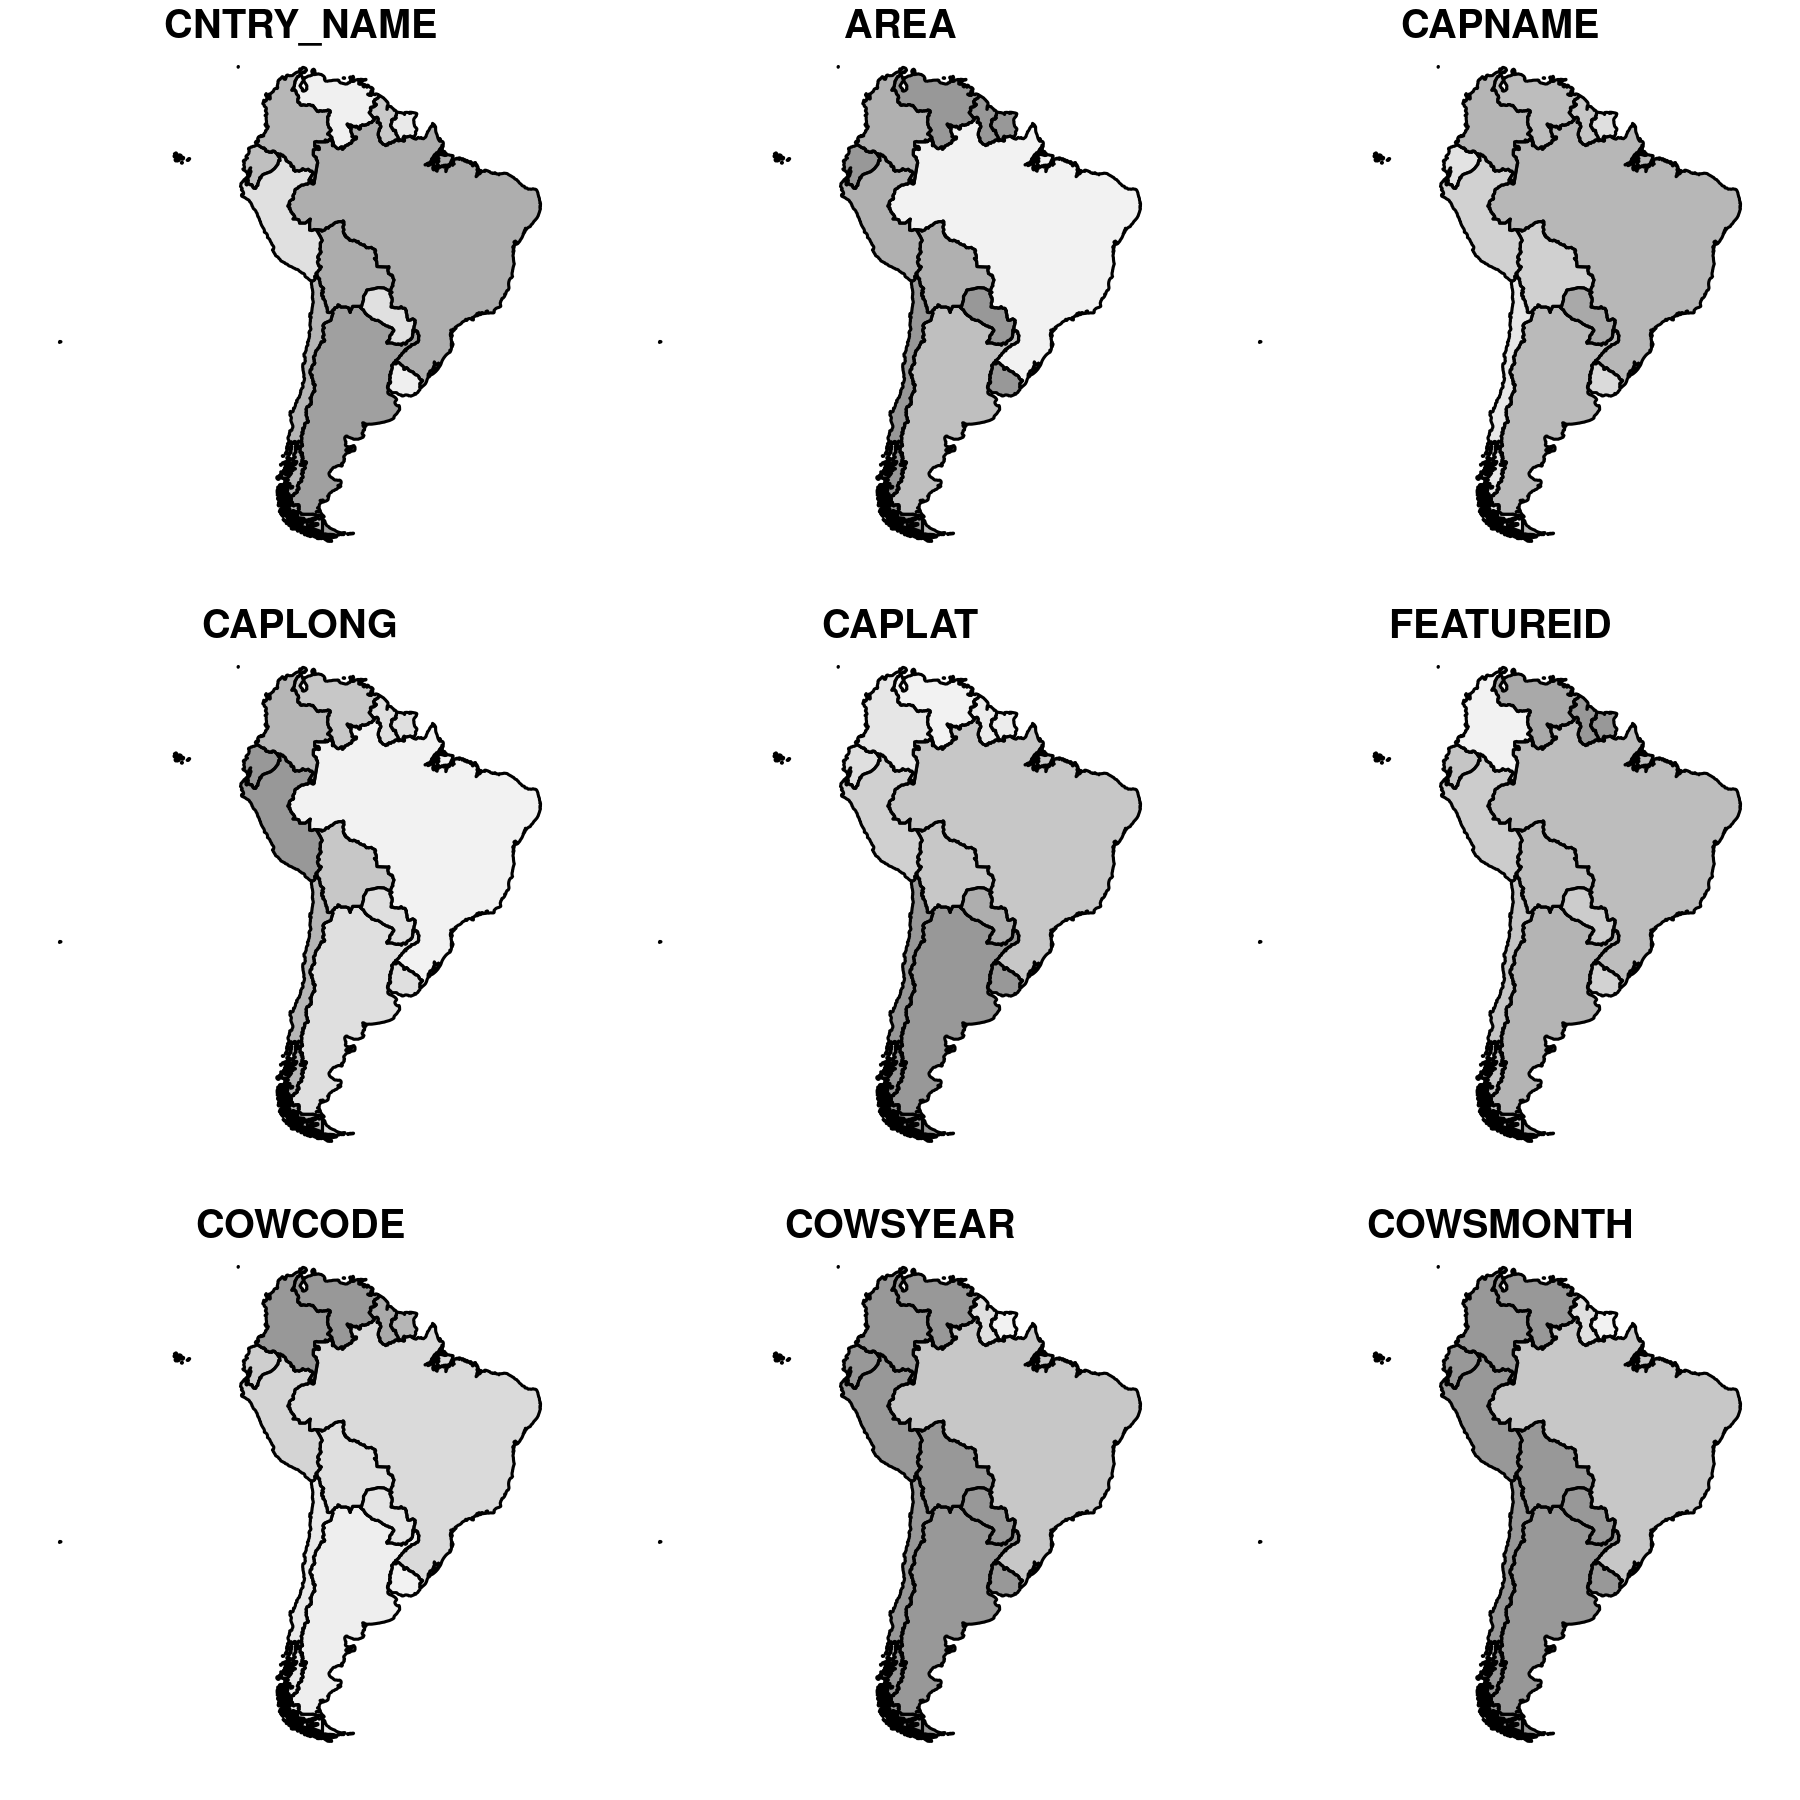

In [15]:
graypal <- function(n)gray.colors(n,start=.2,end=.9,alpha=.5)
plot(SthAmCountries,pal=graypal)

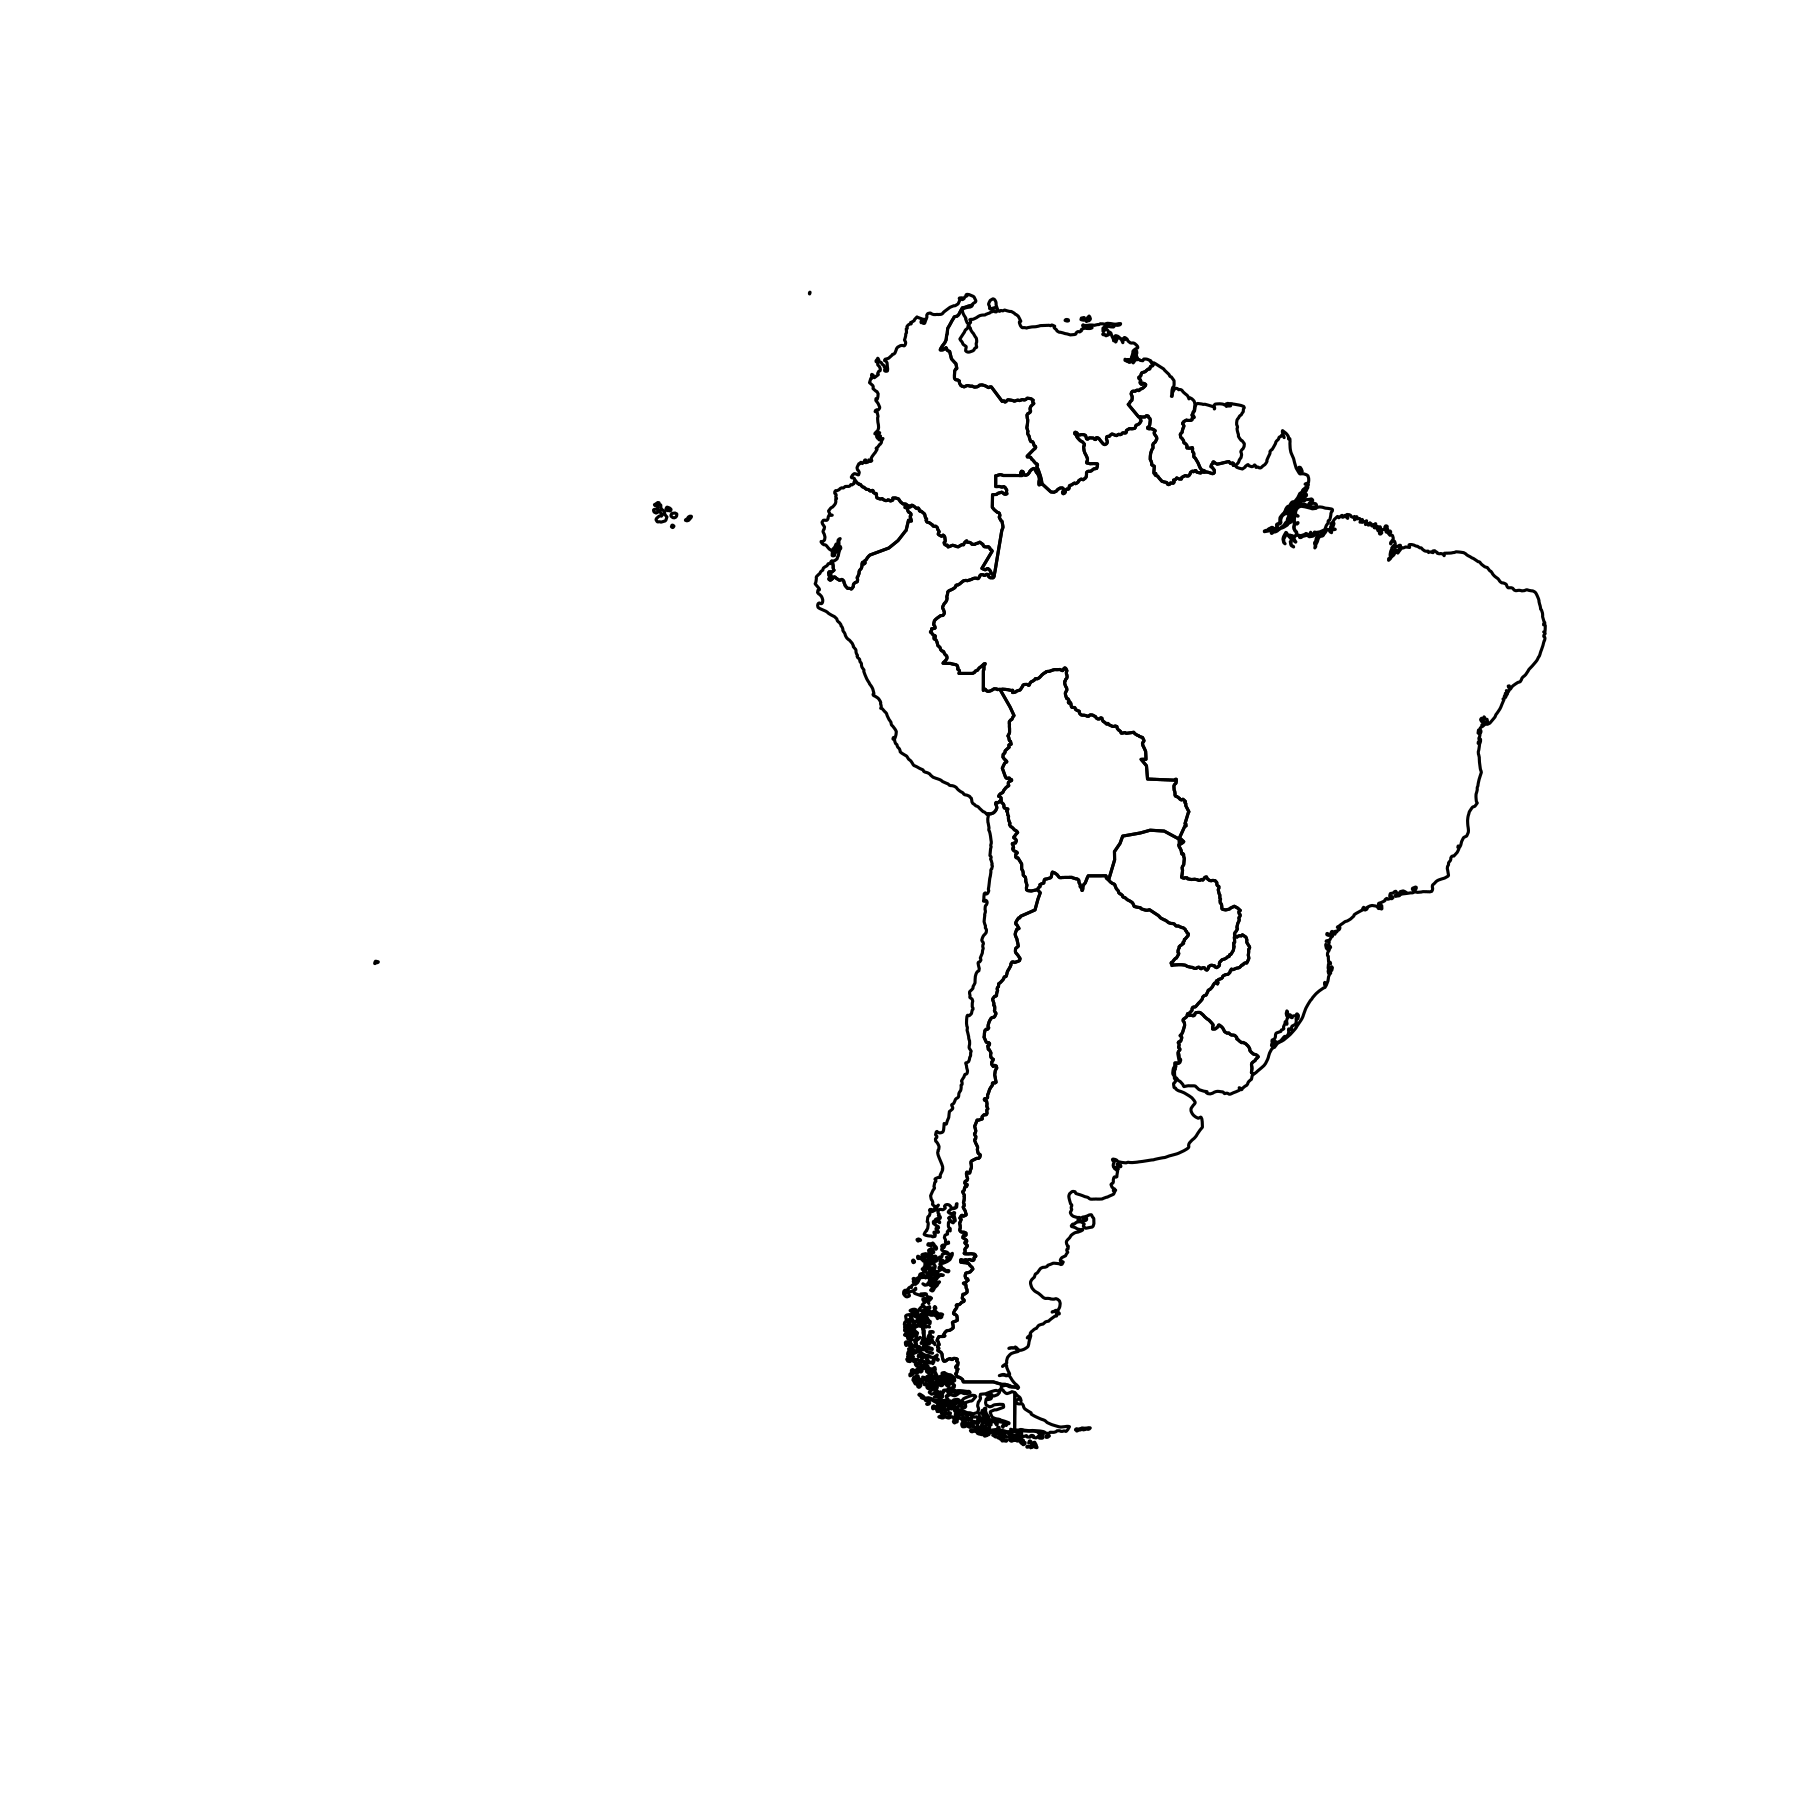

In [16]:
plot(st_geometry(SthAmCountries))

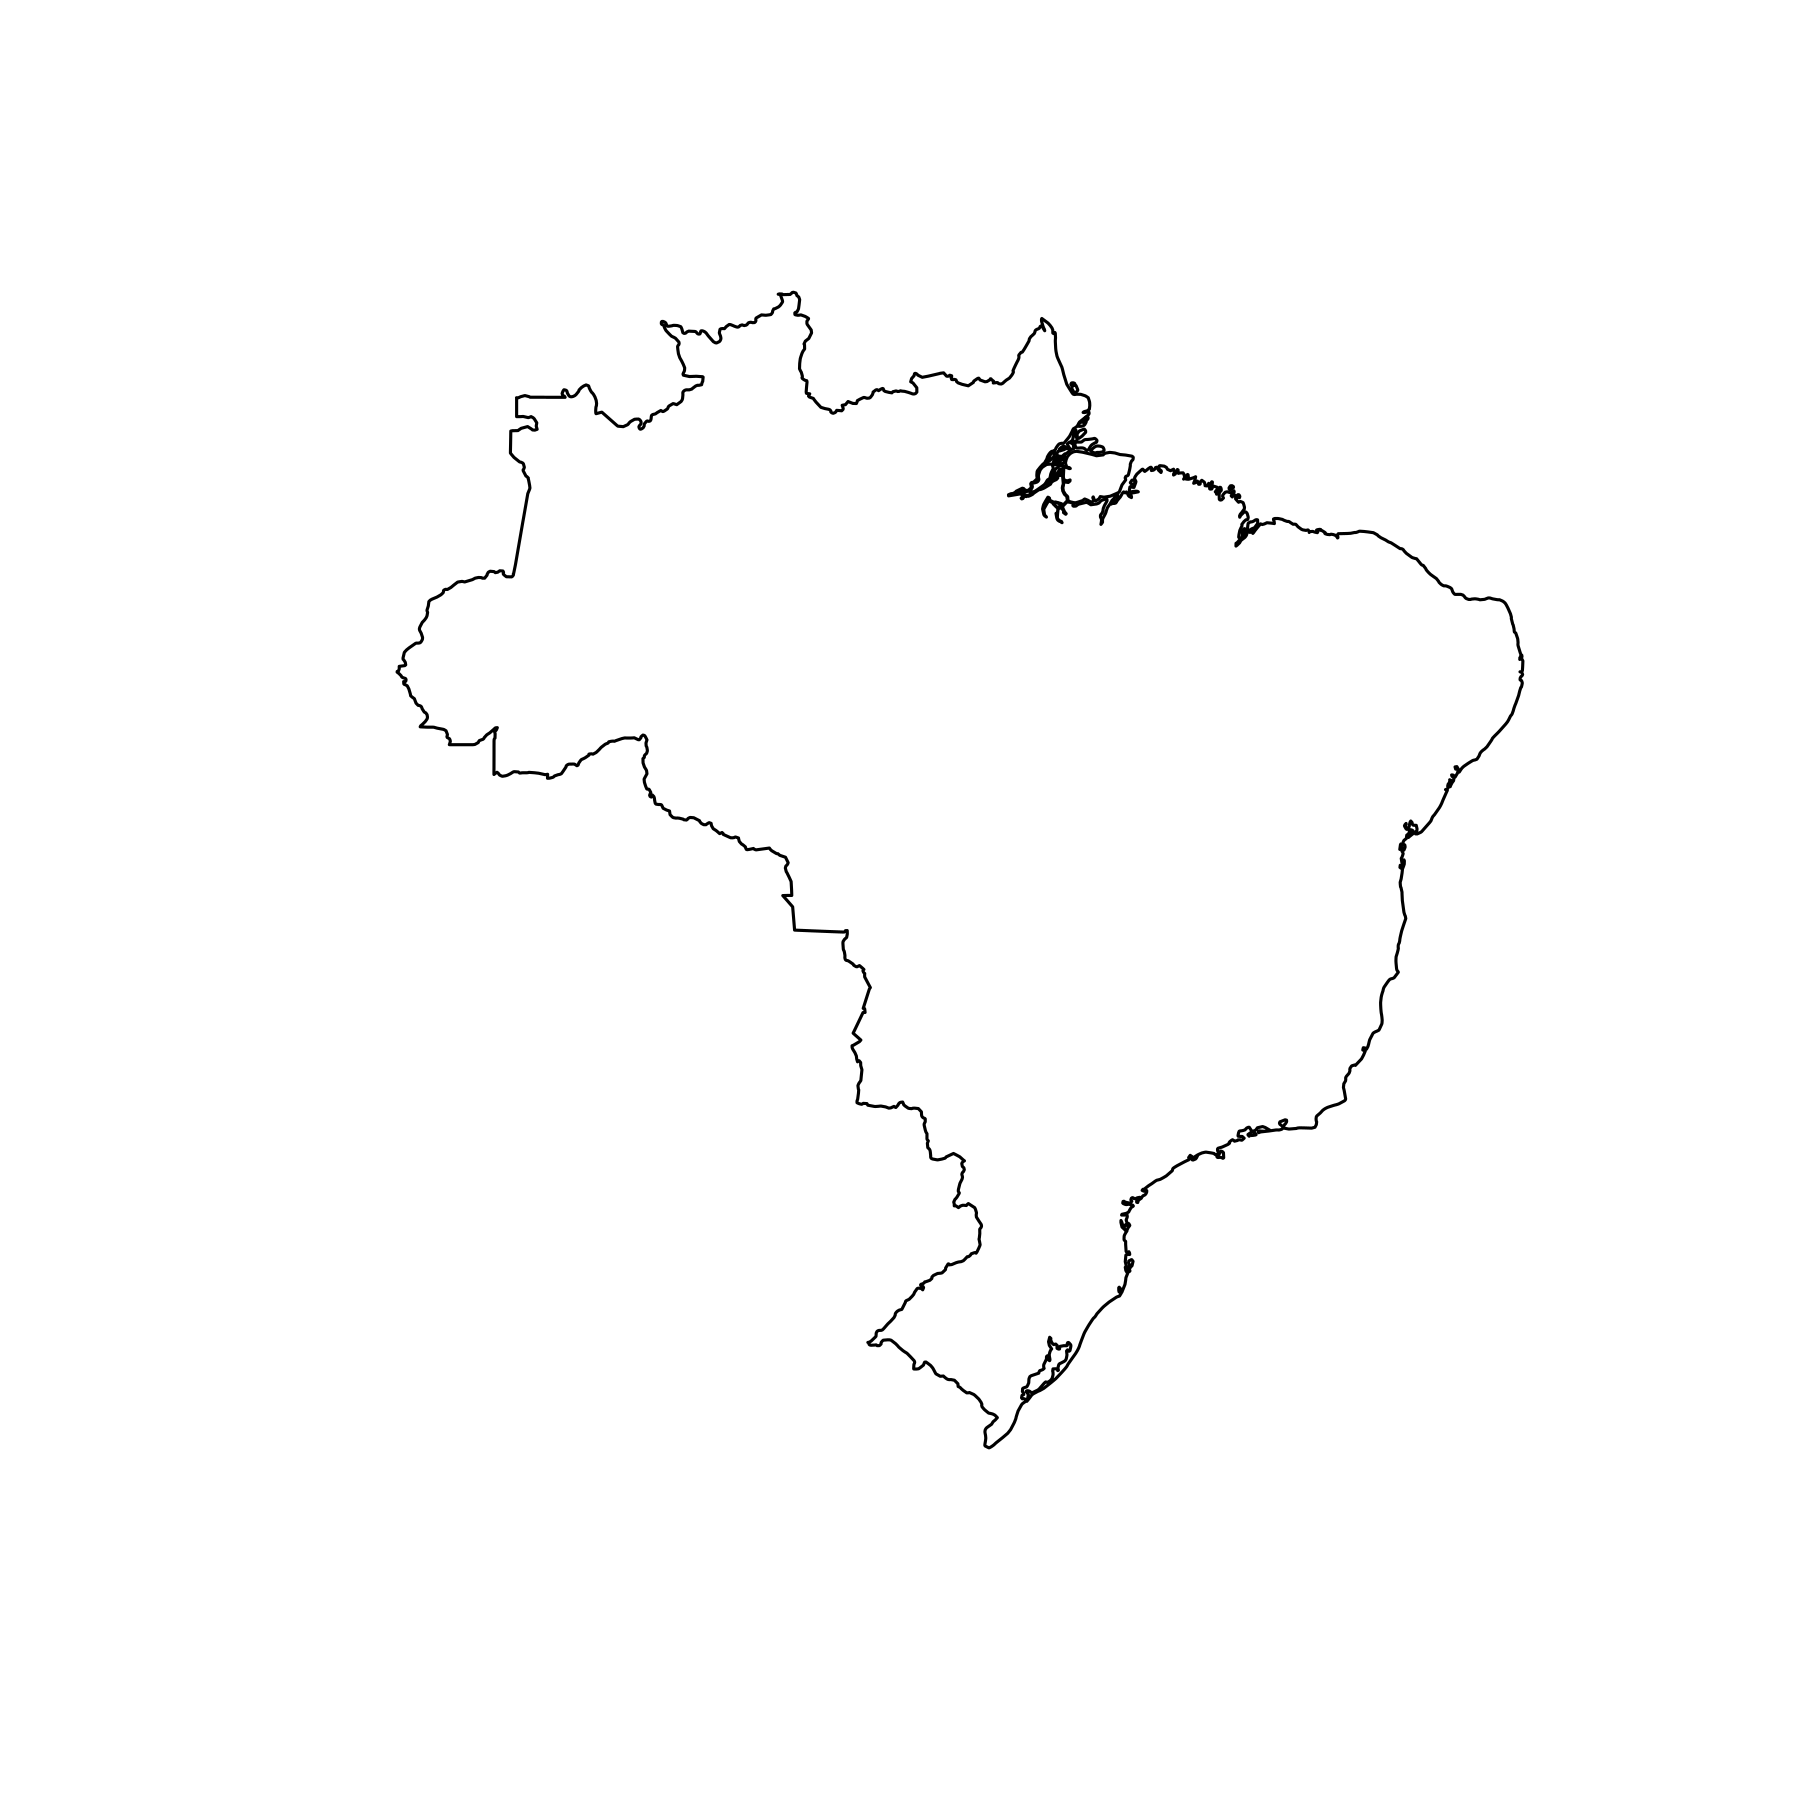

In [17]:
plot(st_geometry(Brazil))

In [18]:
save(cshapes.1990,cshapes.capitals.1990,file="cshapes-1990.RData")
save(Brazil,Chile,Colombia,
     Brasilia,Santiago,Bogota,
     SthAmCountries,
     file="south-america-1990.RData")